In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import xgboost
from sklearn.metrics import accuracy_score,confusion_matrix
import shap

# Data import

In [4]:
col_names = ["Date","Time","Tag Comment","Motor Vol Flow","Motor Flow In","Motor Flow Out","Motor Surf top","Motor Surf Side","Temp Pt100 RTD winding U", \
            "Temp Pt100 RTD winding V", "Temp Pt100 RTD winding W", "Temp PTC thermistor winding", "Temp Feed-through plate", \
            "Lead intersection", "Temp Cable gland", "Temp Terminal box seal", "Temp Terminal", "Temp Ambient", "Frequency", "Voltage", \
            "Current", "Power factor", "Input power", "Output power", "Torque", "Speed", "Slip"]
df = pd.read_excel('./HDE-INT-MOT-20221028-01_HT8_03_N85z-4_OC2_50Hz_70C_R_000759_221107_100743.GEV.xlsx',header=32)
df.columns = col_names
df = df.drop([0],axis=0)
df = df.drop(["Tag Comment","Date","Temp PTC thermistor winding"],axis=1)
df["Time"] = list(np.arange(19206))
df = df[df["Frequency"]!="INVALID"]
print(df.shape)
df.head(5)
df = df.astype(float)

Workbook contains no default style, apply openpyxl's default


(19204, 24)


# SHAP

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


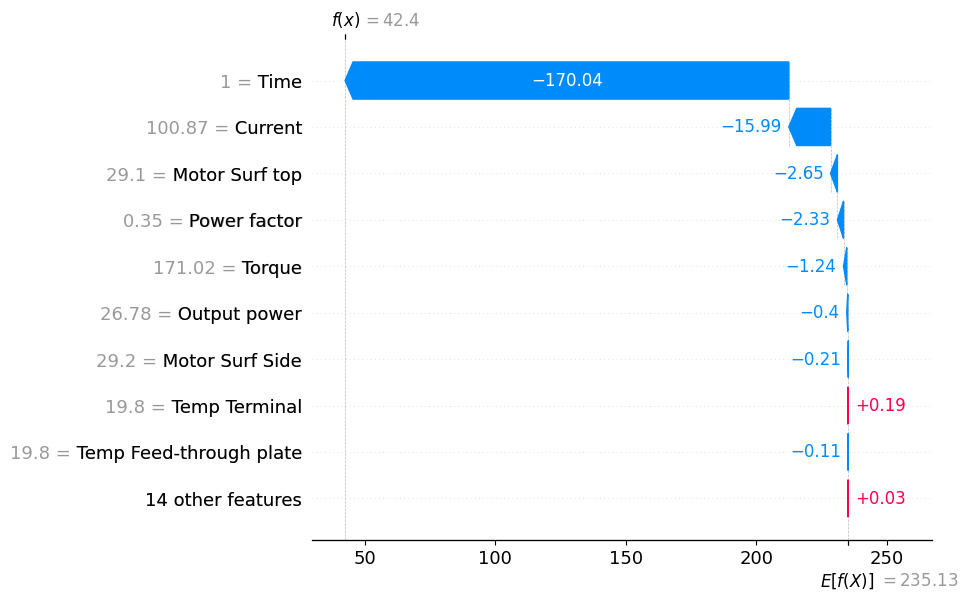

In [39]:
y = df["Input power"]
X = df.drop("Input power", axis=1)
model = xgboost.XGBRegressor().fit(X, y)

explainer = shap.Explainer(model)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])
#shap.plots.scatter(shap_values[0:1000])

# Scatterplot Analysis

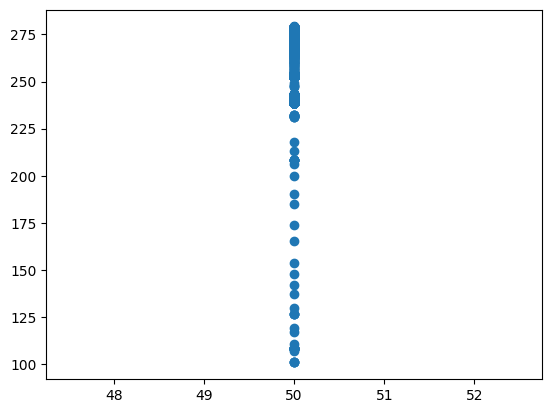

In [9]:
plt.scatter(df["Frequency"],df["Current"])

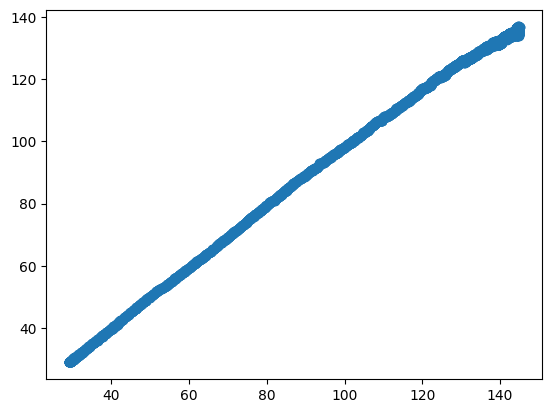

In [12]:
plt.scatter(df["Motor Surf top"],df["Motor Surf Side"])

[]

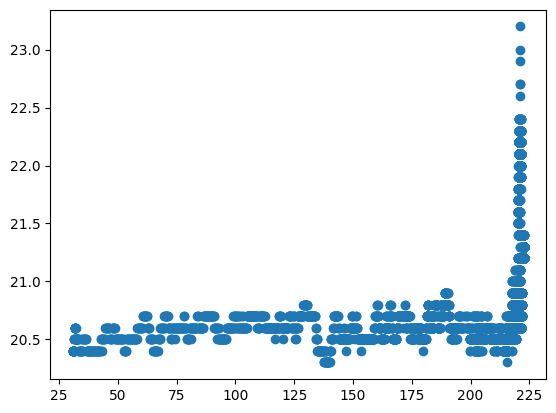

In [13]:
plt.scatter(df["Temp Pt100 RTD winding U"],df["Temp Ambient"])
plt.plot()


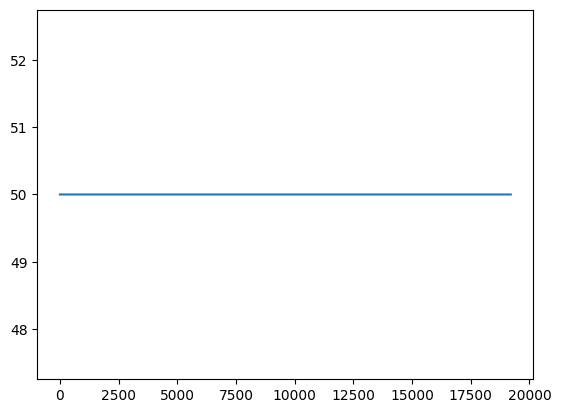

In [15]:
plt.plot(df["Frequency"])